# Analisis de presupuesto y popularidad

En este notebook, nos enfocaremos en explorar y analizar las relaciones existentes entre dos variables específicas: **'budget'** y **'popularity'**. Nuestro objetivo principal es investigar cómo el presupuesto asignado a una película o proyecto (indicado por la variable 'budget') se correlaciona o afecta su popularidad (representada por alguna medida de 'popularity', como votos en IMDb, puntuaciones en TMDB).

Para llevar a cabo este análisis, seguiremos varios pasos clave:

1.  **Limpieza y Preparación de Datos:** Primero, aseguraremos que el conjunto de datos esté limpio y listo para el análisis. Esto incluye la eliminación de filas con valores nulos o cero en las variables 'budget' y 'popularity', ya que estos datos incompletos podrían distorsionar nuestros resultados.
    
2.  **Exploración de Datos:** Realizaremos una exploración inicial de los datos para entender la distribución de ambas variables, incluyendo estadísticas descriptivas como la media, mediana, desviación estándar, y la visualización a través de histogramas, diagramas de caja, o gráficos de densidad. Esto nos permitirá identificar tendencias generales, así como cualquier anomalía o dato atípico.
    
3.  **Análisis de Correlación:** Utilizaremos métodos estadísticos para evaluar la correlación entre 'budget' y 'popularity'. La correlación nos indica si existe una relación entre estas dos variables y, de ser así, qué tan fuerte es esa relación. Esto puede incluir el cálculo del coeficiente de correlación de Pearson o Spearman, dependiendo de la naturaleza y distribución de los datos.
    
4.  **Visualización de Relaciones:** Para complementar nuestro análisis cuantitativo, crearemos visualizaciones como gráficos de dispersión que nos permitan observar la relación entre el presupuesto y la popularidad de una forma más intuitiva. Estas visualizaciones pueden ayudarnos a identificar patrones, tendencias o agrupaciones específicas dentro de los datos.
    
5.  **Interpretación y Conclusiones:** Finalmente, interpretaremos los resultados de nuestro análisis, tratando de extraer conclusiones sobre la relación entre el presupuesto de una película y su popularidad. Consideraremos si un mayor presupuesto se traduce consistentemente en mayor popularidad, o si la relación es más compleja y está influenciada por otros factores. También discutiremos las limitaciones de nuestro análisis y posibles pasos futuros para una investigación más profunda.

In [30]:
import pandas as pd

df = pd.read_csv('df_stream_kaggle.csv')

In [46]:
# Filtrar para mantener solo las filas donde 'budget' no es nulo y diferente de 0
df_filtered = df.dropna(subset=['budget'])
# Como teniamos valores dónde bugdet teambien era 0 los hemos descartado.
df_filtered = df_filtered[df_filtered['budget'] != 0]
# Eliminar las columnas que no sirven dentro de este análisis
df1 = df_filtered.drop(columns=['id', 'description', 'seasons', 'name', 'imdb_id', 'nconst', 'Unnamed: 0','primaryName', 'subscription_cost', 'genres','type', 'runtime', 'production_countries', 'main_genre'])
# Reordenamos el indice
df1.reset_index(drop=True, inplace=True)
# Preguntamos con cuantas filas nos hemos quedado tras el filtrado de datos
print(f'Hay un total de {df1.shape[0]} filas')

Hay un total de 2434 filas


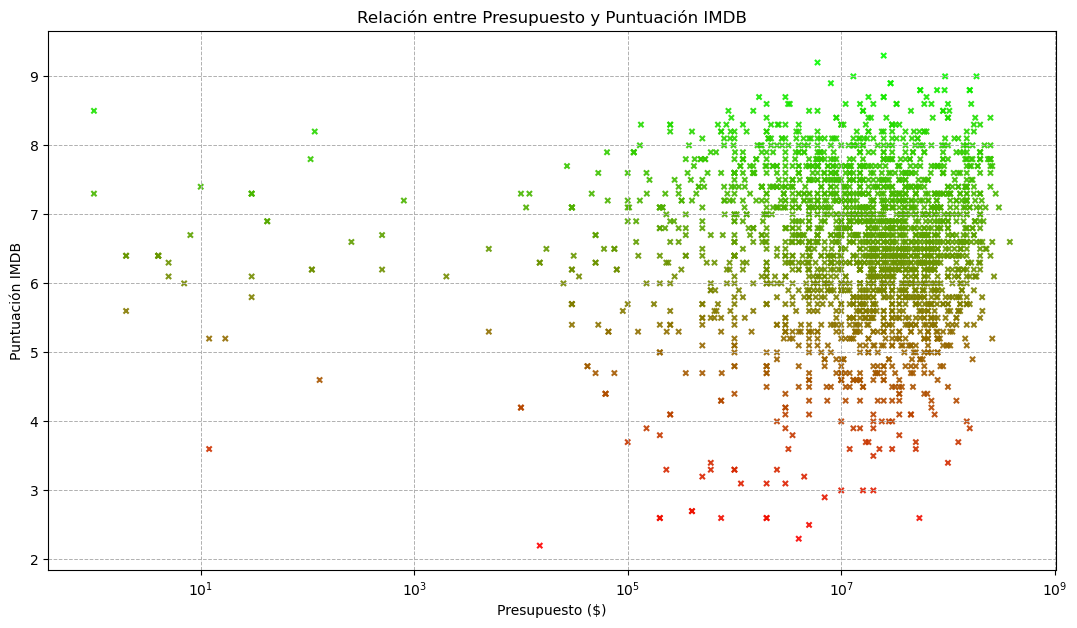

In [86]:
fig, ax = plt.subplots(figsize=(13,7))
# Cambiar el marcador a 'x' y hacerlo más pequeño para mayor precisión
scatter = ax.scatter(df1['budget'], df1['imdb_score'], alpha=0.9, s=14, c=colors, marker='x')
ax.set_title('Relación entre Presupuesto y Puntuación IMDB')
ax.set_xlabel('Presupuesto ($)')
ax.set_ylabel('Puntuación IMDB')
ax.set_xscale('log')  # Escala logarítmica para el eje del presupuesto
ax.grid(True, which="both", ls="--", linewidth=0.7)

plt.show()